In [1]:
import pandas as pd
import numpy as np

Descriptive Evaluation

In [4]:
data = {
    'texts': [
        "Apple is looking at buying U.K. startup for $1 billion",
        "Microsoft has acquired GitHub for $7.5 billion",
        "Amazon's new headquarters will be in Virginia",
        "Tesla's new electric car is amazing"
    ]
}
df = pd.DataFrame(data)

Most frequent entities: [('Apple', 1), ('U.K.', 1), ('$1 billion', 1), ('Microsoft', 1), ('GitHub', 1), ('$7.5 billion', 1), ('Amazon', 1), ('Virginia', 1), ('Tesla', 1)]
Least frequent entities: {'Apple': 1, 'U.K.': 1, '$1 billion': 1, 'Microsoft': 1, 'GitHub': 1, '$7.5 billion': 1, 'Amazon': 1, 'Virginia': 1, 'Tesla': 1}
Saving the pickle results to: entity-output.pkl
Saving the plot figure to:  entity-analysis.png


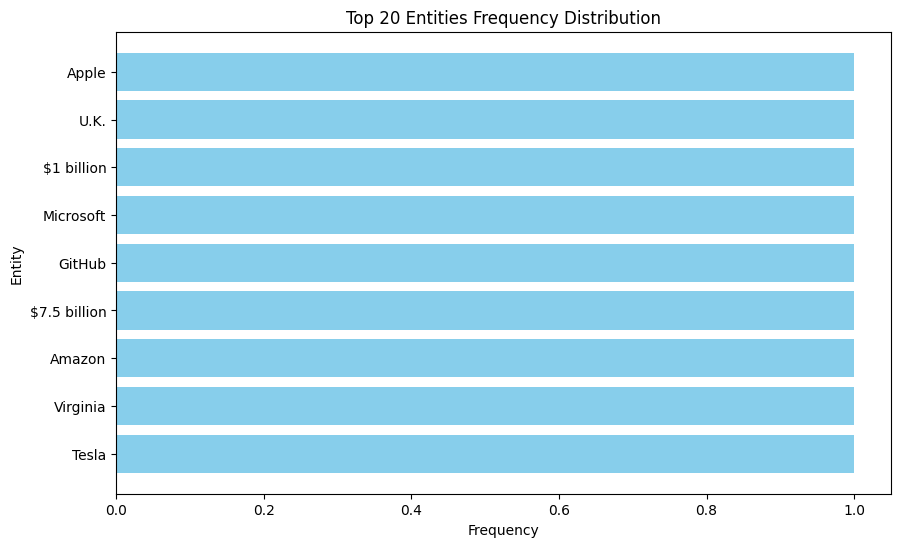

In [5]:
from sdgeval.descriptive.descriptor import Descriptor
from sdgeval.descriptive.arguments import DescriptorArgs
desc_analyze = Descriptor(data['texts'], DescriptorArgs(produce_plot=True))
desc_analyze.analyze()

Downstream Evaluation

In [7]:
from transformers import TrainingArguments as HfTrainingArguments
from sdgeval.downstream.classify.train_classifier import TrainingArguments, MiscArguments, ModelFT, Arguments

if __name__ == "__main__":
        #arg_parser = transformers.HfArgumentParser((TrainingArguments, MiscArguments))
        #train_args, model_args = arg_parser.parse_args_into_dataclasses()
        train_args = TrainingArguments()
        model_args = MiscArguments()
        model_args.is_train = True
        model_args.text_field = 'sentence'
        args = Arguments(train=train_args, model=model_args)
        print("Initialization...")
        if(args.model.is_train):
          print("Training:\n")
          obj = ModelFT(args = args)
          obj.finetune_model()
        if(args.model.is_test):
          print("Testing:\n")
          obj = ModelFT(args = args)
          obj.test_model()

/home/kramesh3/.local/lib/python3.9/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Initialization...
Training:



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Successfully loaded dataset 'sst2' from Hugging Face Hub.
Loading base model for fine-tuning...
Preprocessing dataset!


Running tokenizer on dataset:   0%|          | 0/67349 [00:00<?, ? examples/s]

/home/kramesh3/.local/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2829: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


KeyboardInterrupt: 

Privacy Evaluation

In [ ]:
@Test cases need to be updated

Fairness Evaluation

In [8]:
from sdgeval.fairness.test import generate_single_label_test_df
df = generate_single_label_test_df(n=100, c=2)
df['Subgroup'] = np.random.choice(['a', 'b', 'c'], size=len(df))

In [11]:
from sdgeval.fairness.metrics import analyze_group_fairness_performance

p_df, f_df = analyze_group_fairness_performance(df, problem_type = "single_label", num_classes = 2)
print(p_df.head())
print(f_df.head())


   Accuracy    Confusion Matrix Group Type  Num of Samples  f1_macro  \
0  0.500000  [[12, 8], [10, 6]]          a              36  0.485714   
1  0.548387  [[6, 2], [12, 11]]          b              31  0.536325   
2  0.454545    [[7, 9], [9, 8]]          c              33  0.454044   

   f1_micro  TN  FP  FN  TP  
0  0.500000   6   8  10  12  
1  0.548387  11   2  12   6  
2  0.454545   8   9   9   7  
  Group Type     FNED      FPED     TPED      TNED       FNR       TNR  \
0          a  0.22105  0.515176  0.22105  0.515176  0.454545  0.428571   
1          b  0.22105  0.515176  0.22105  0.515176  0.666667  0.846154   
2          c  0.22105  0.515176  0.22105  0.515176  0.562500  0.470588   

        TPR       FPR  F1-micro-diff  F1-macro-diff  Equalized Odds  
0  0.545455  0.571429       0.093842       0.082281        0.417582  
1  0.333333  0.153846       0.093842       0.082281        0.417582  
2  0.437500  0.529412       0.093842       0.082281        0.417582  


Qualitative Evaluation

In [13]:
import pandas as pd
from sdgeval.qual.metrics import QualEval
from sdgeval.qual.arguments import MauveArgs, LMArgs, FrechetArgs
from dataclasses import dataclass

df = pd.DataFrame({'source': ['The dog ran after the cat.', 'The Eiffel Tower is one of the tallest buildings in the world.'],
                       'reference': ['The dog chased the cat.', 'The Eiffel Tower is in Paris used to be one of the tallest buildings in the world.']})


@dataclass
class args_temp:
    FrechetArgs:FrechetArgs
    MauveArgs:MauveArgs
    LMArgs:LMArgs

args_ = args_temp(FrechetArgs, MauveArgs, LMArgs)
qual_ob = QualEval(args_)
qual_ob.calculate_fid_score(df)

FID Score:  {'real_scores': [0.7306349873542786, 0.7306349873542786], 'synth_scores': [0.6123455762863159, 0.657977283000946]}
